In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(w, u, v):
    # Compute shift term for log-sum-exp trick
    us, vs = ((w@u)**2), ((w@v)**2)
    shift = max(us, vs)
    # Compute function value using log-sum-exp trick
    return shift + np.log(np.exp((w@u)**2 - shift) + np.exp((w@v)**2 - shift))

def g(w, u, v):
    # Compute shift term for exp-normalize trick
    us, vs = ((w@u)**2), ((w@v)**2)
    shift = max(us, vs)
    # Compute gradient numerator with exp-normalize
    t = 2*(np.exp((w@u)**2 - shift)*np.outer(u, u) + np.exp((w@v)**2 - shift)*np.outer(v, v))@w
    # Compute gradient denominator with exp-normalize
    b = np.exp((w@u)**2 - shift) + np.exp((w@v)**2 - shift)
    # Final term is numerator / denominator
    return t / b

def ag(w, u, v, a):
    # Compute shift term for exp-normalize trick
    us, vs = ((w@u)**2) + np.log(a), ((w@v)**2) + np.log(a)
    shift = max(us, vs)
    # Compute gradient numerator with exp-normalize
    t = 2*(np.exp((w@u)**2 + np.log(a) - shift)*np.outer(u, u) + np.exp((w@v)**2 + np.log(a) - shift)*np.outer(v, v))@w
    # Compute gradient denominator with exp-normalize
    b = np.exp((w@u)**2 - shift) + np.exp((w@v)**2 - shift)
    # Final term is numerator / denominator
    return t / b

def h(w, u, v):
    t1 = 4*(np.exp((w@u)**2)*((w@u)**2)*np.outer(u, u) + np.exp((w@v)**2)*((w@v)**2)*np.outer(v, v))
    b1 = np.exp((w@u)**2) + np.exp((w@v)**2)
    t2 = 4*np.exp((w@u)**2)*np.outer(u, u)@np.outer(w, w)@(np.exp((w@u)**2)*np.outer(u, u)).T
    b2 = (np.exp((w@u)**2) + np.exp((w@v)**2))**2
    return (t1 / b1) - (t2 / b2)

f_min = np.log(2)

0.0007627263556146957


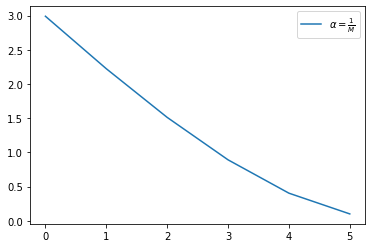

In [3]:
def gd(w0, u, v, num_iter=100):
    w = w0
    t_list = [0]
    f_list = [f(w0, u, v) - f_min]
    for t in range(1, num_iter+1):
        # Compute smoothness
        Mt = 4*( ((w@u)**2)*(u@u) + ((w@v)**2)*(v@v) )
        # Set learning rate
        a = 1 / Mt
        # Take gradient step
        #wn = w - a*g(w, u, v)
        # Take stabilized gradient step
        wn = w - ag(w, u, v, a)
        # Store results
        t_list.append(t)
        f_list.append(f(wn, u, v) - f_min)
        w = wn
        
    return t_list, f_list

# 1 -> inf, nan, 4 -> nan, nan
np.random.seed(0)

# Set dimension
d = 100

# Initialize weights
w0 = np.random.rand(d)

# Initialize data
x, y, z = np.random.rand(3, d)
u = x - y
v = x - z

# Run gradient descent
t1_list, f1_list = gd(w0, u, v)
print(min(f1_list))

# Filter after the point where it stops descending
ft1_list, ff1_list = [], []
for t, f1, f2 in zip(t1_list, f1_list[:-1], f1_list[1:]):
    if f2 <= f1:
        ft1_list.append(t)
        ff1_list.append(f1)
    else:
        break

# Plot results
fig, ax, = plt.subplots()
ax.plot(ft1_list, ff1_list, label=r'$\alpha = \frac{1}{M}$')
ax.legend()
plt.show()